In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [2]:
pop = np.loadtxt('pop_new.csv')

In [3]:
rs = np.arange(0.01, 1, 0.02)

In [4]:
rs

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

In [5]:
Inference_mean = np.zeros((50,3142,60))
Inference_std = np.zeros((50,3142,60))
Inference_ensemble_std = np.zeros((50,3142,60))
Observation_i = np.zeros((50,3142,60))
Ensemble_position = {}

In [6]:
R0 = 2.1
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
for r_idx in range(50):
    print(r_idx)
    r_i = rs[r_idx]
    file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r_i,2))
    f1 = gzip.GzipFile(file_name1, "r")
    NewInf =  np.load(f1)
    
    NewInf[NewInf == 0] = 0.000000000000001
    log_i = np.log(NewInf)
    log_avg_i = np.mean(log_i,axis=0) ### mu
    std_ens = np.std(log_i,axis=0) ###sigma
    
    std_new = 9*np.exp(-0.5*log_avg_i) + 0.2
    
    Inference_mean[r_idx,:] = log_avg_i
    Inference_std[r_idx,:] = std_new
    Inference_ensemble_std[r_idx,:] = std_ens
    temp = NewInf[10,:,:]
    temp[temp==0] = 0.000000000000001
    
    obser_ts = np.log(temp) ## take the log
#     obser_ts = temp/pop[:,None]*100000
#     Observation_i[r_idx,:,:] = obser_ts
    Observation_i[r_idx,:,:] = temp
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [118]:
rs[25]

0.5099999999999999

In [22]:
rs_selected = [0,1,2,3,4,5,6,25,49] ### select some r values
rs_chosen = rs[rs_selected]

In [7]:
th = 10
log_avg_i = Observation_i[25,:,:]
position = np.where(log_avg_i[:,59]>np.log(th))

Text(0, 0.5, 'mean_log(daily new infections)')

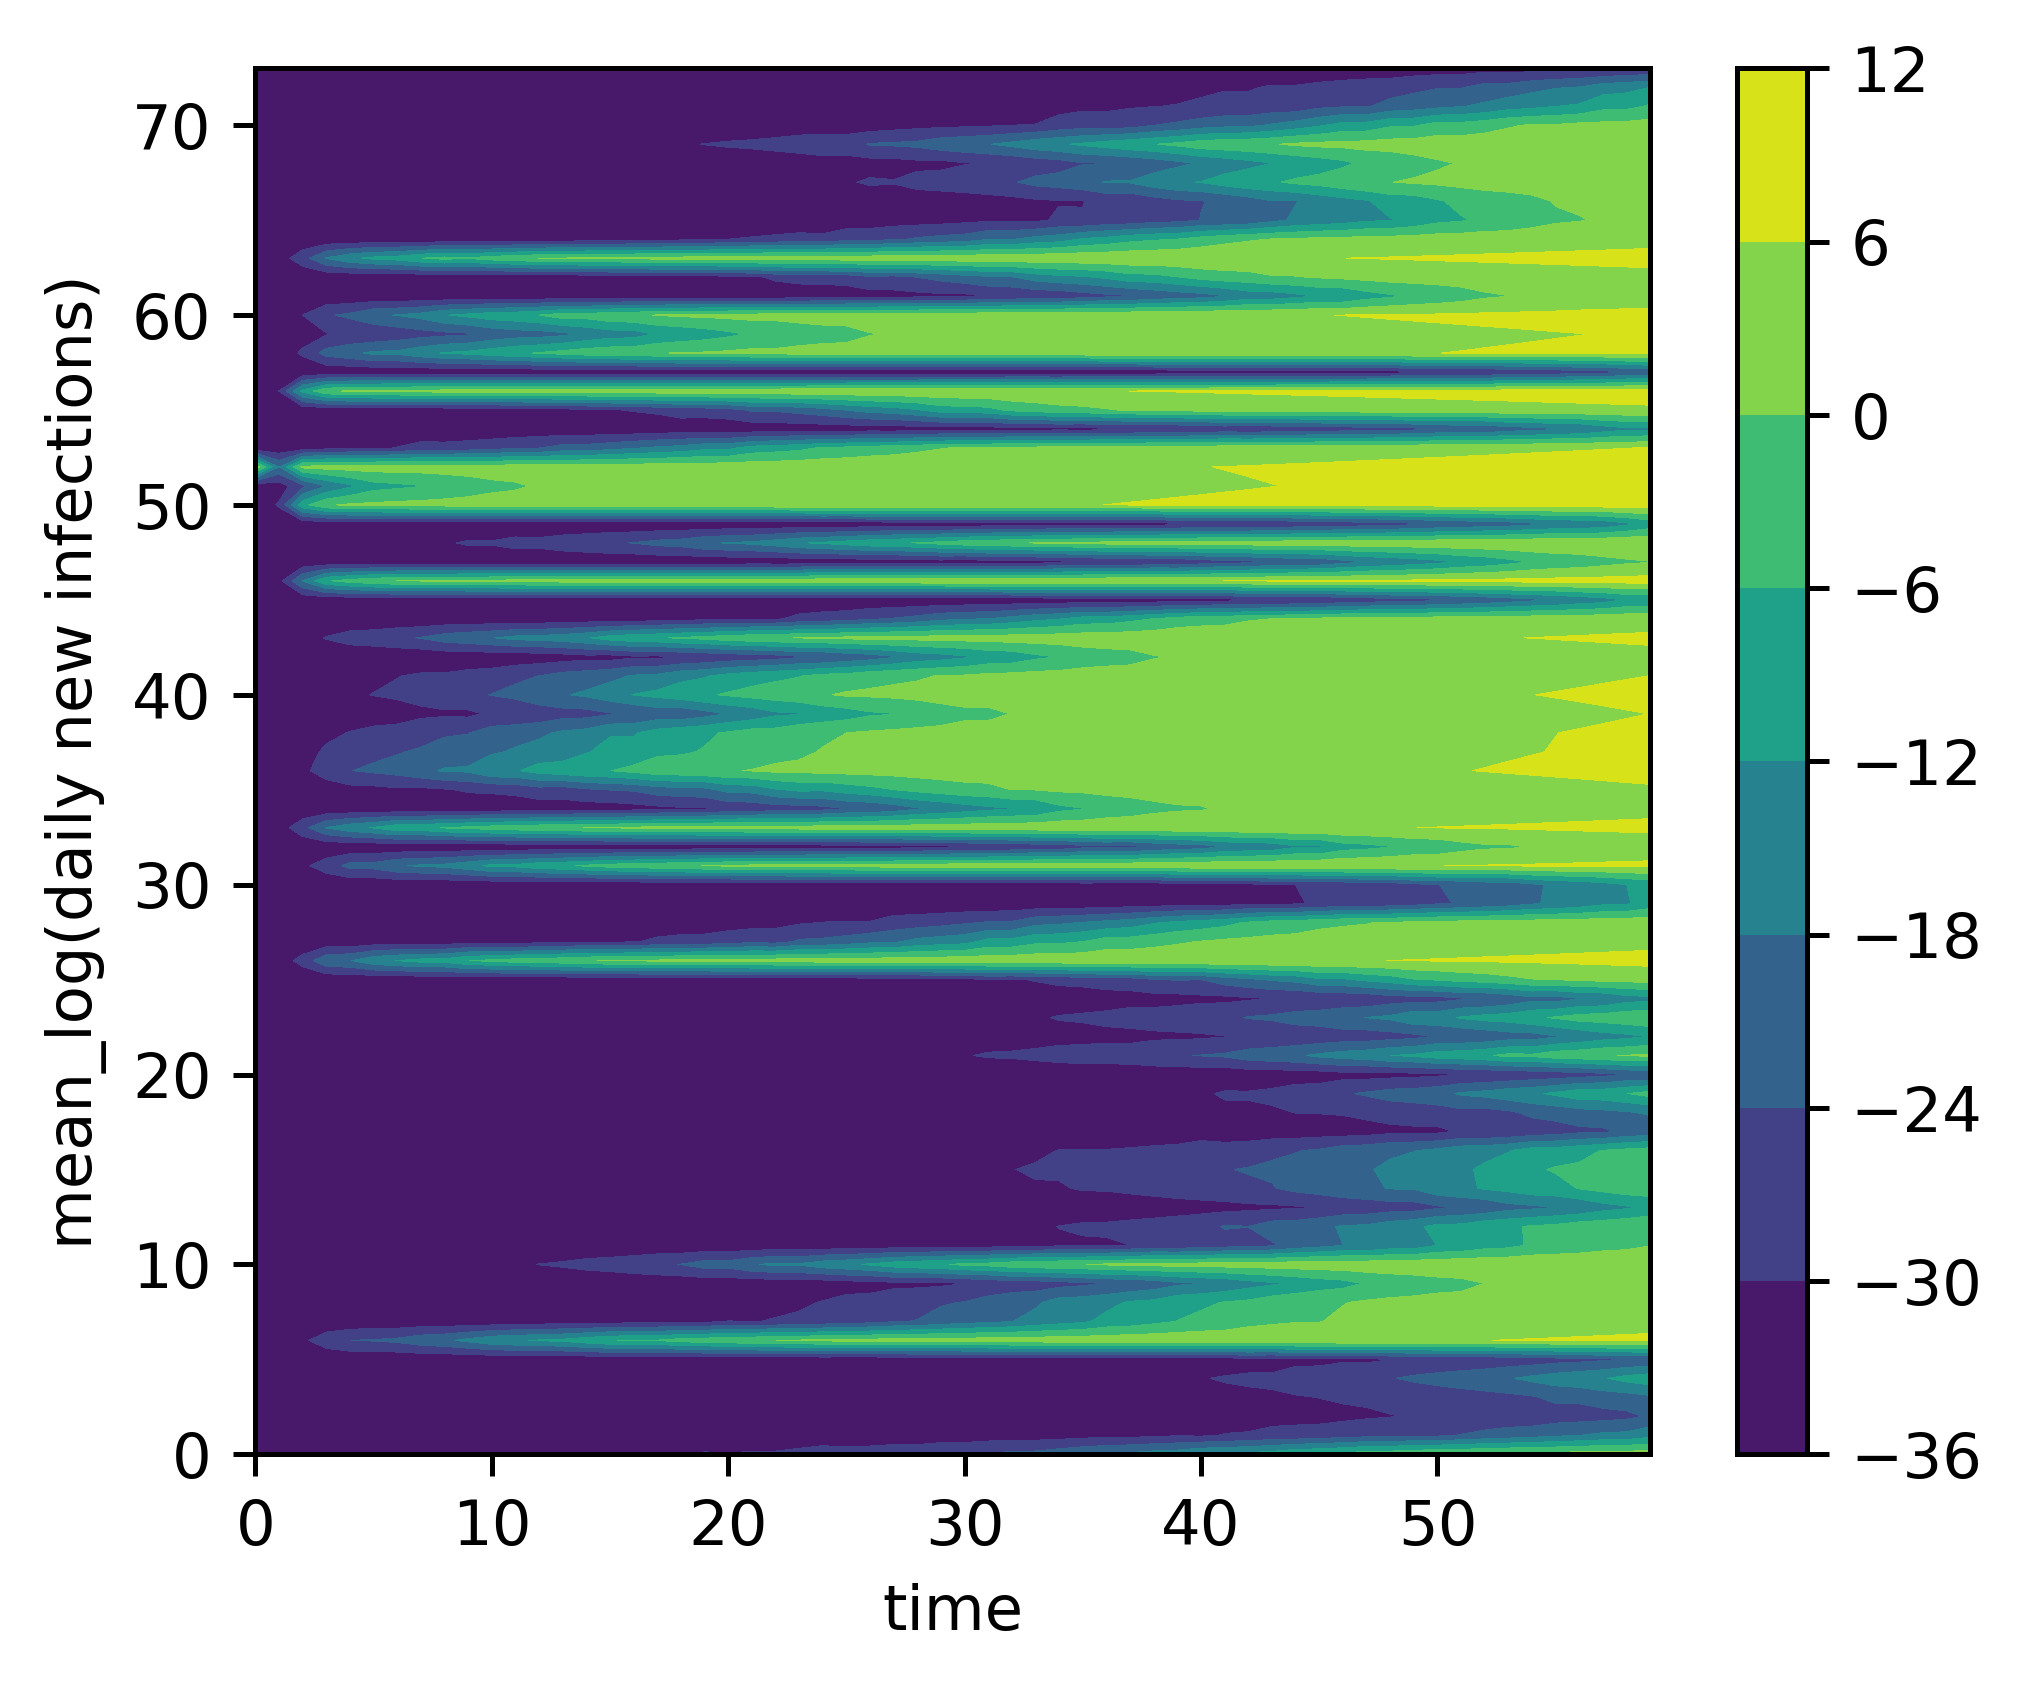

In [11]:
x = np.array(range(60))
y = np.array(range(74))

X, Y = np.meshgrid(x, y)

Z = Inference_mean[25][position]
# Z = g_i[:,30:]

fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, cmap=plt.cm.viridis) #vmax=36

cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
plt.xlabel('time')
plt.ylabel('mean_log(daily new infections)')

In [8]:
Cave = np.loadtxt('Cave.csv')

In [31]:
Cave

array([[ 41168.,      0.,      0., ...,      0.,      0.,      0.],
       [     0., 202830.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,  22670., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ...,  19303.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,   7668.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,   5987.]])

In [9]:
import networkx as nx

In [32]:
WN = np.loadtxt('W_avg.csv')

In [34]:
g_m = nx.from_numpy_array(WN)

In [36]:
nx.is_weighted(g_m)

True

In [99]:
color_map = []
for node in g_m:
    if node in position[0]:
        color_map.append('black')
    else: 
        color_map.append('gray')  # color other nodes red

In [100]:
color_map[1859-1]='red'

In [93]:
g_m.remove_edges_from(nx.selfloop_edges(g_m))

In [94]:
# pos = nx.spring_layout(g_m,k=0.01)
pos = nx.circular_layout(g_m)
# pos = nx.shell_layout(g_m)

In [95]:
edge_weights = nx.get_edge_attributes(g_m, "weight")
edge_width = np.array(list(edge_weights.values()))*2

In [98]:
nx.edges(g_m,1859-1)

EdgeDataView([(1858, 204), (1858, 223), (1858, 228), (1858, 308), (1858, 309), (1858, 312), (1858, 319), (1858, 446), (1858, 610), (1858, 1207), (1858, 1219), (1858, 1225), (1858, 1229), (1858, 1775), (1858, 1776), (1858, 1780), (1858, 1782), (1858, 1784), (1858, 1785), (1858, 1786), (1858, 1787), (1858, 1788), (1858, 1789), (1858, 1791), (1858, 1793), (1858, 1830), (1858, 1840), (1858, 1841), (1858, 1851), (1858, 1857), (1858, 1861), (1858, 1863), (1858, 1866), (1858, 1868), (1858, 1870), (1858, 1871), (1858, 1879), (1858, 1887), (1858, 2283), (1858, 2294), (1858, 2314), (1858, 2579), (1858, 2623)])

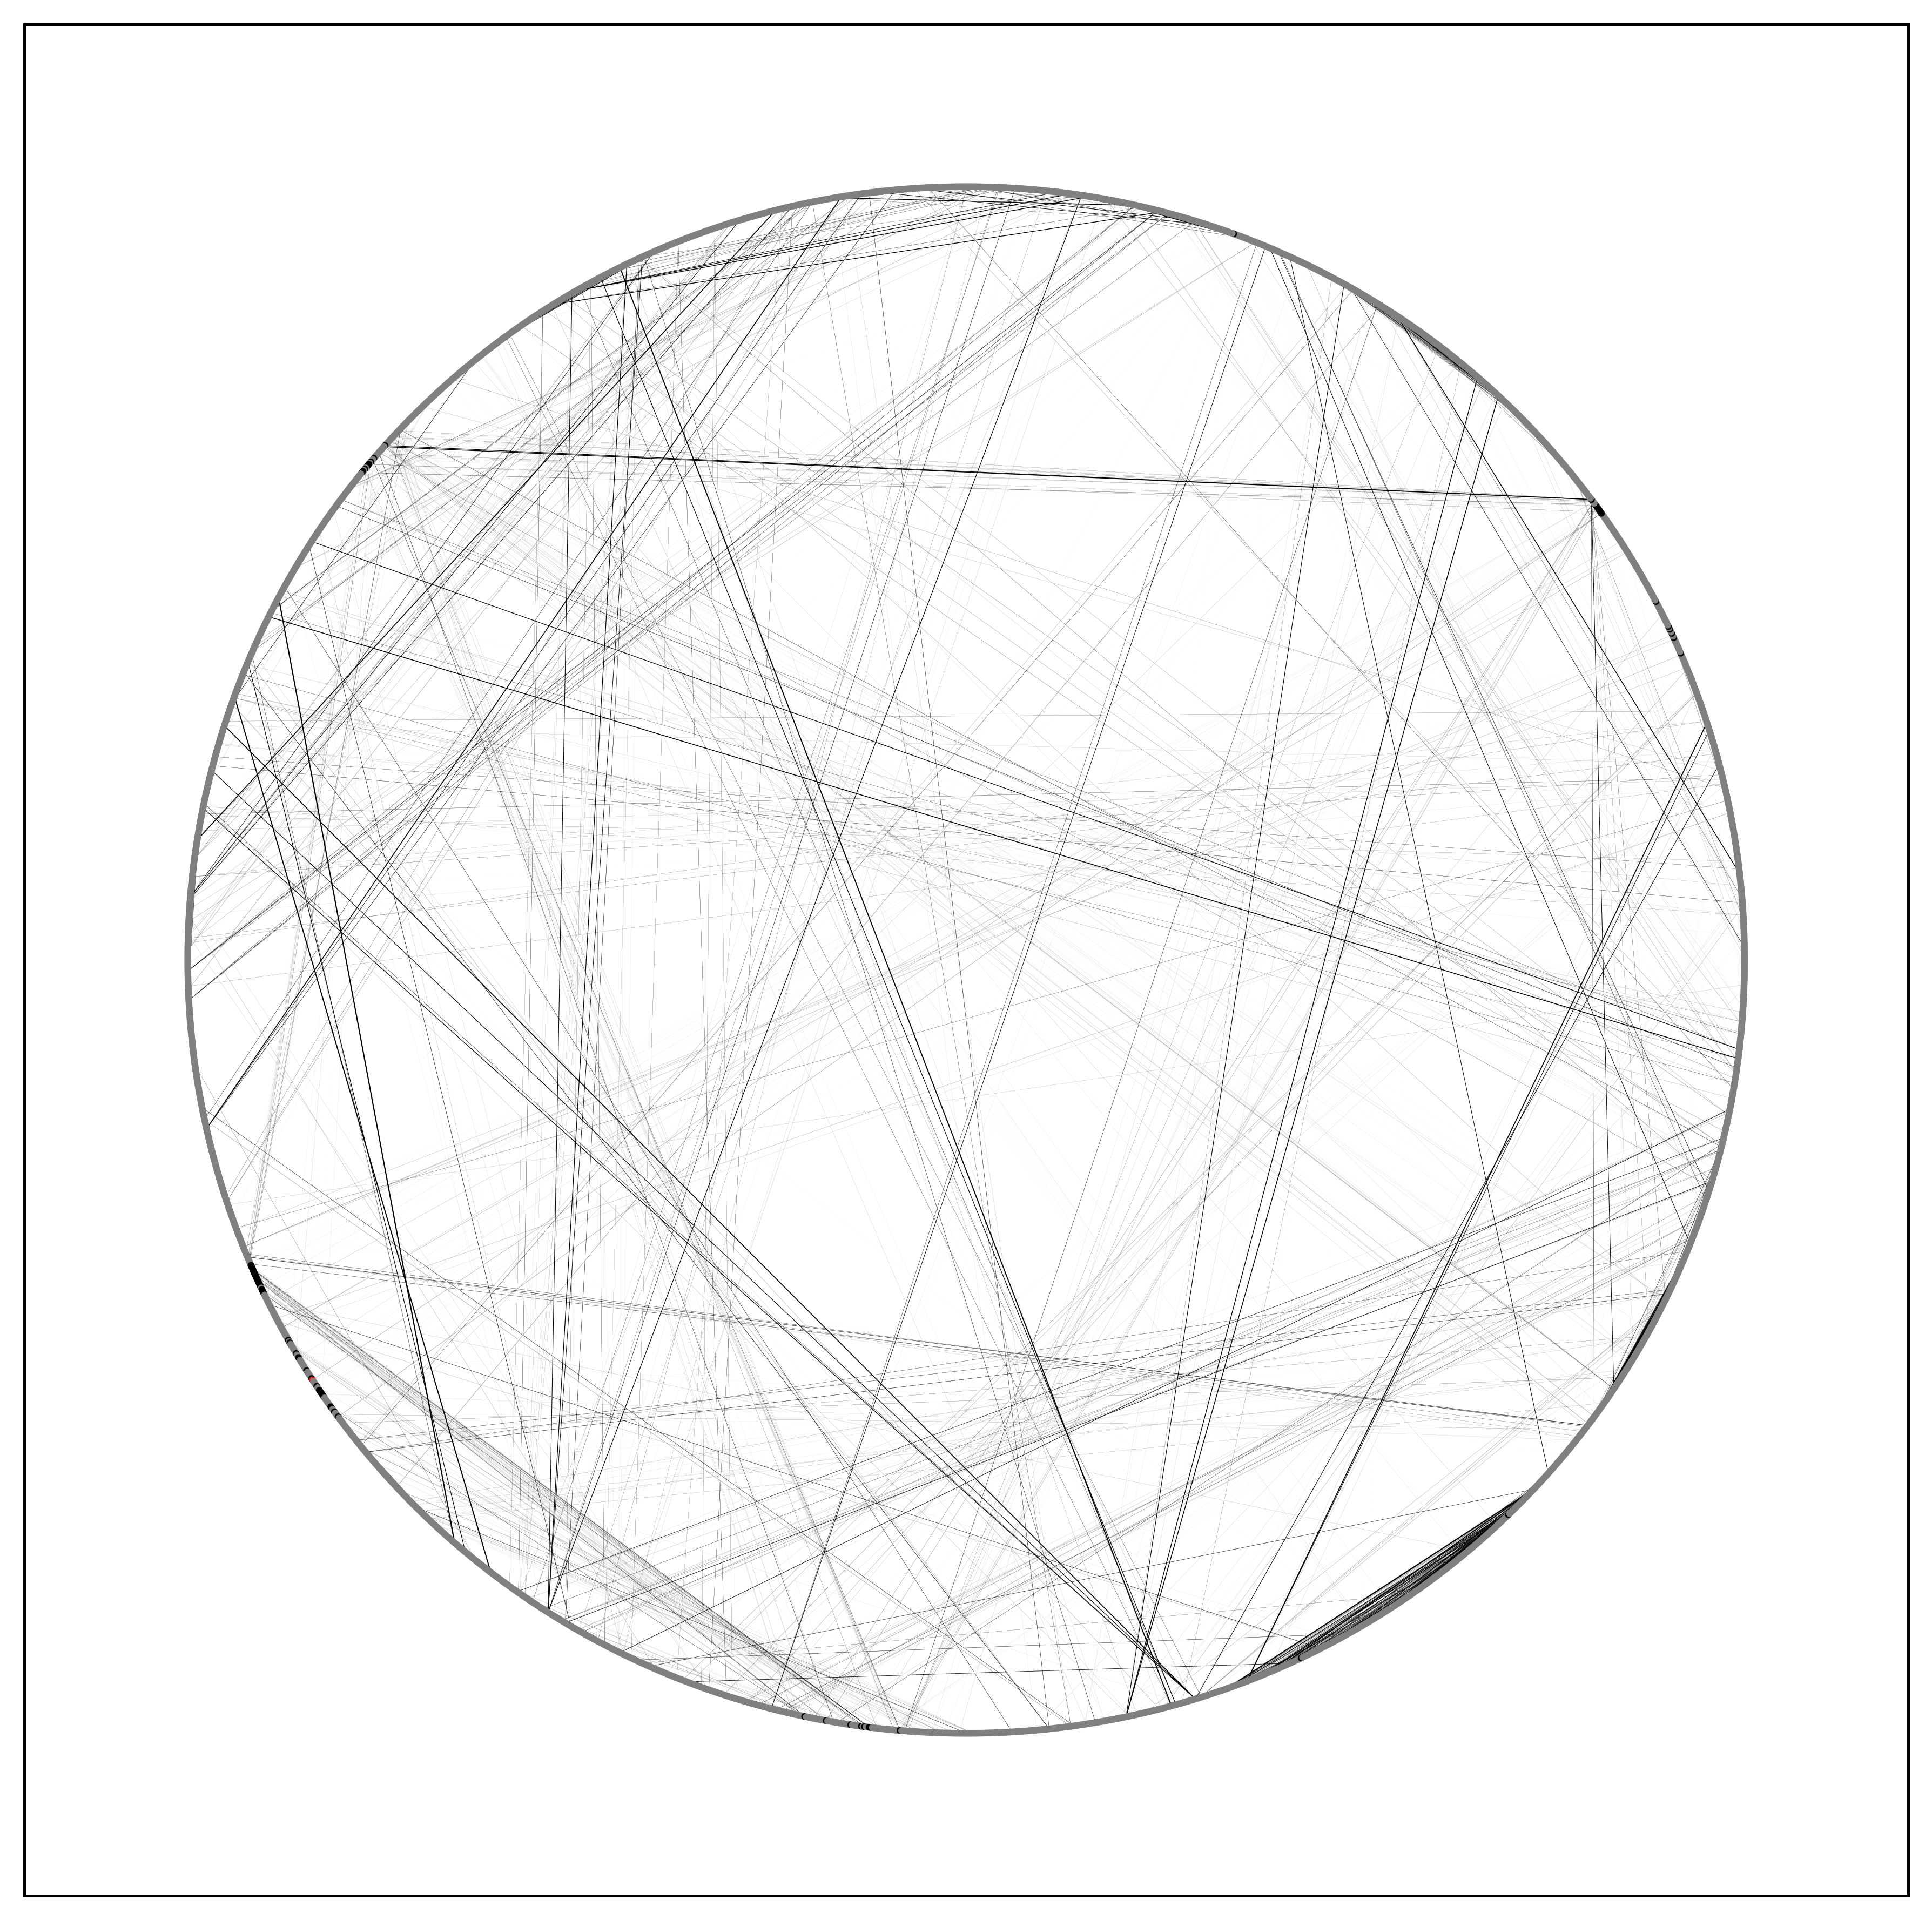

In [101]:
plt.figure(figsize=(10,10),dpi=450)
nx.draw_networkx(g_m,with_labels=False,node_size=1,node_color=color_map,pos=pos,width=edge_width)

Text(0, 0.5, 'observed_log(daily new infections)')

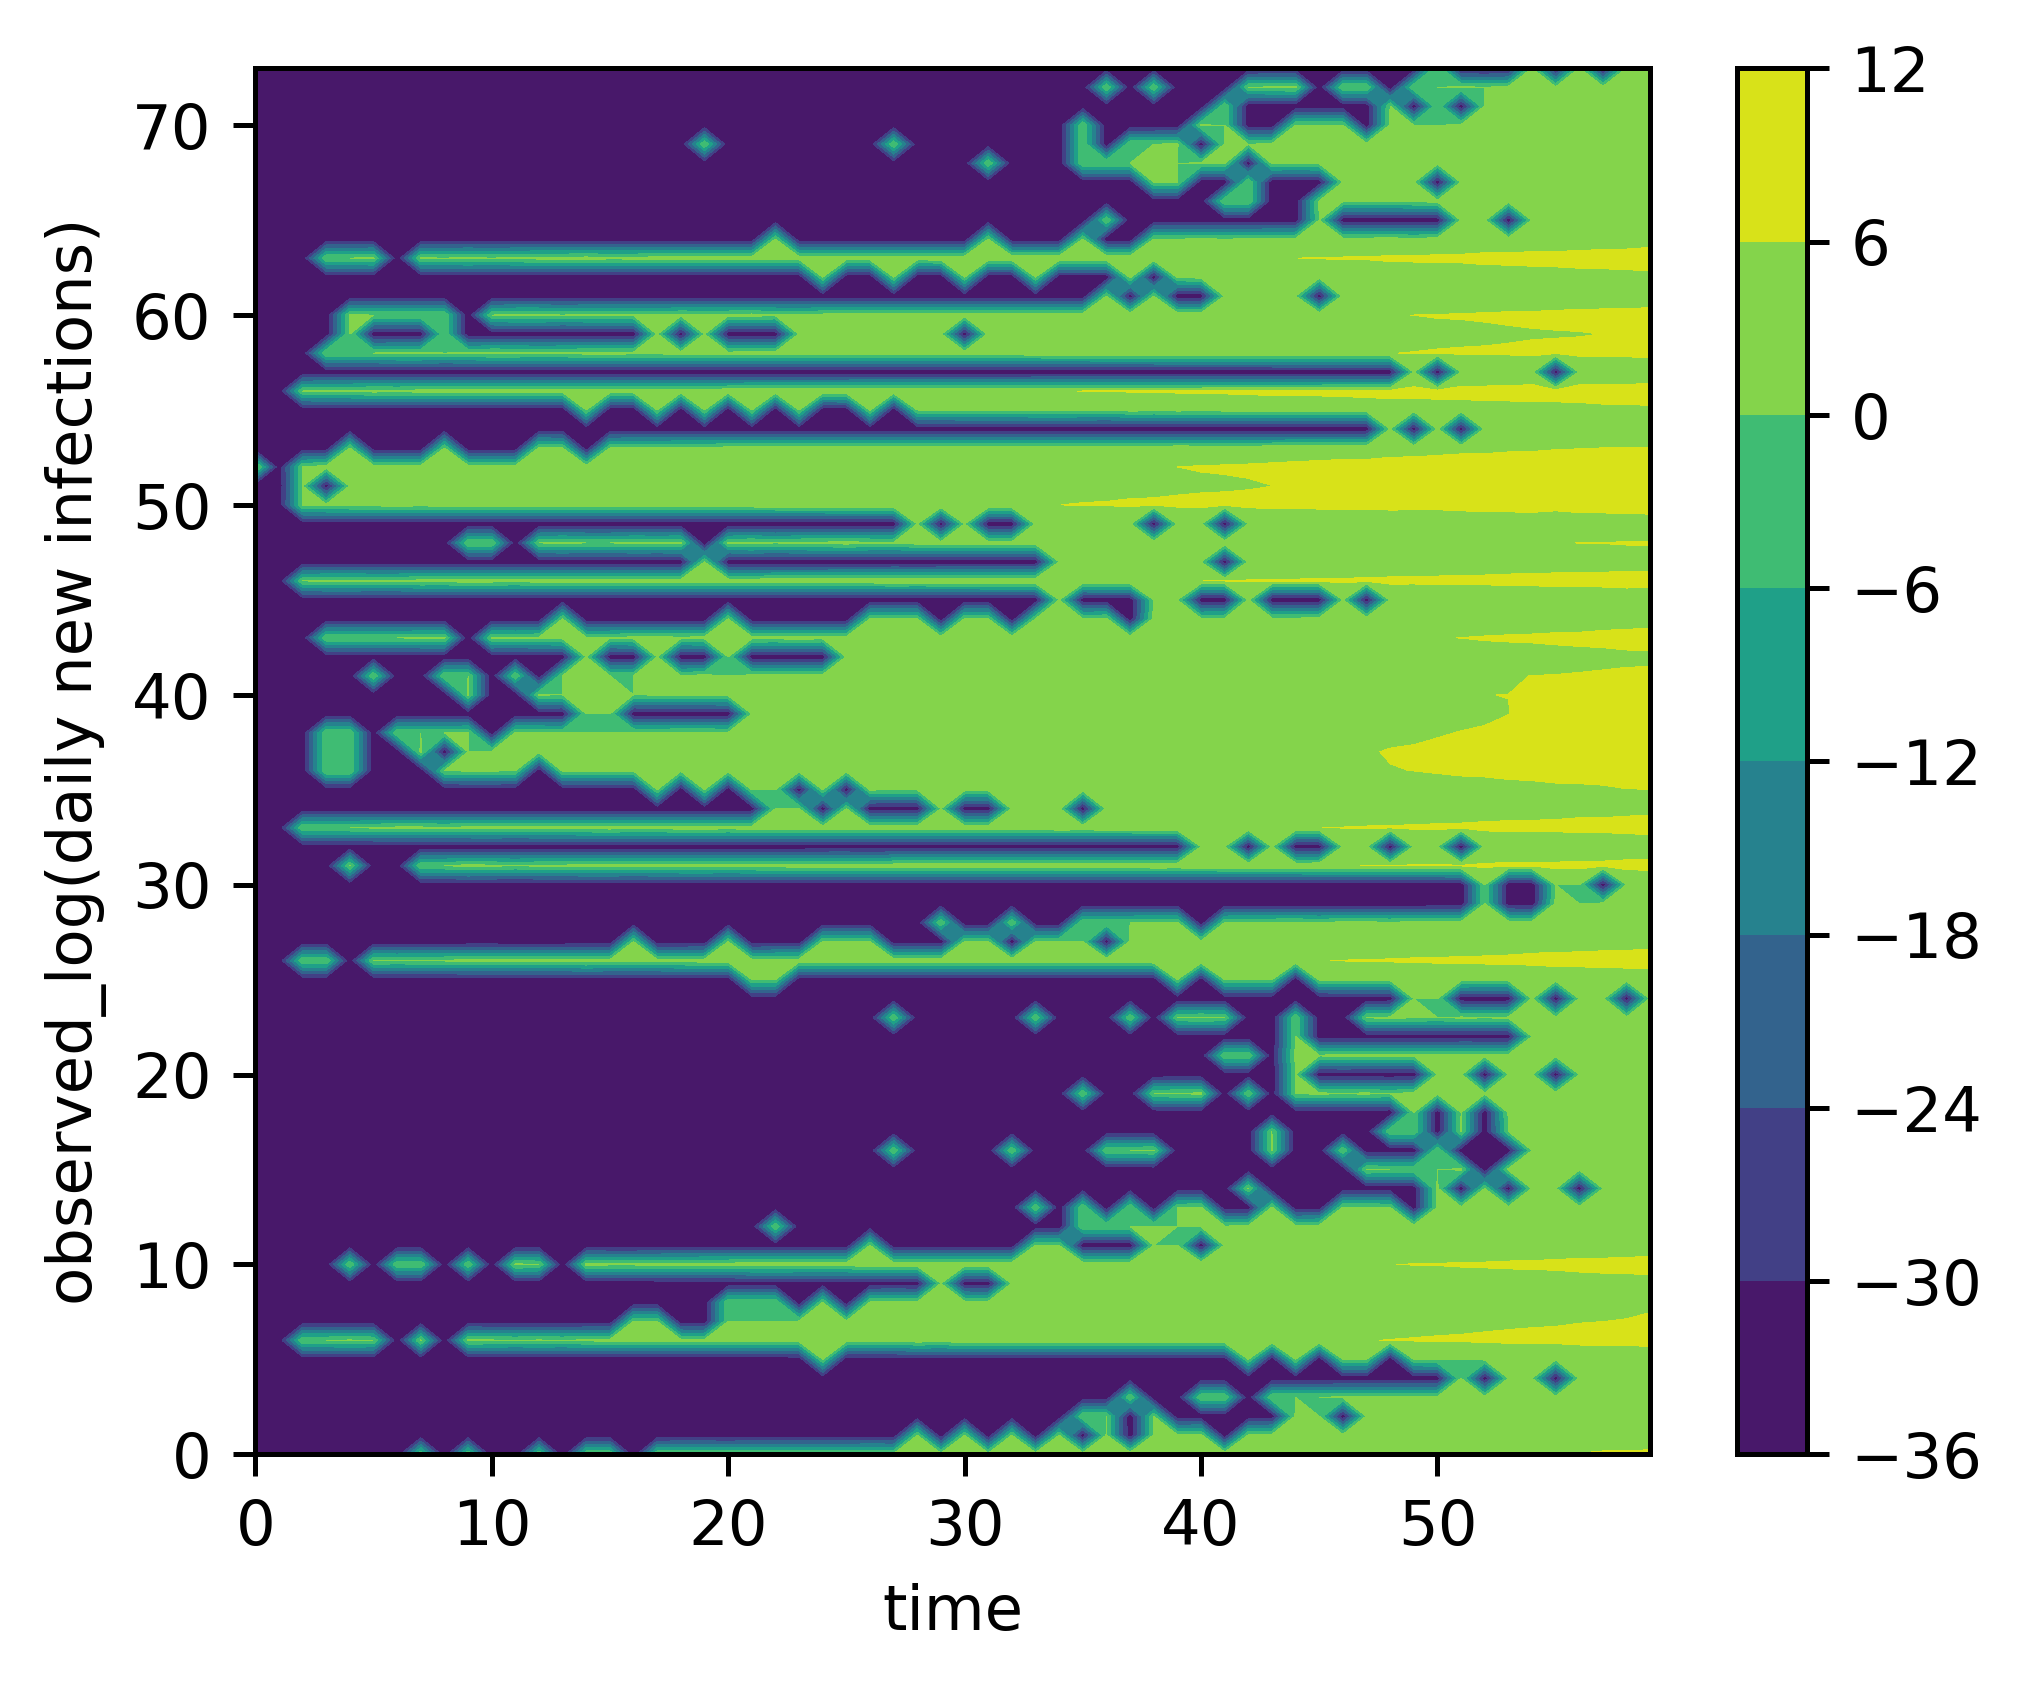

In [72]:
x = np.array(range(60))
y = np.array(range(74))

X, Y = np.meshgrid(x, y)

# Z = np.log(observed_ts[position])
Z = np.log(log_avg_i[position])

fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, cmap=plt.cm.viridis) #vmax=36

cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
plt.xlabel('time')
plt.ylabel('observed_log(daily new infections)')

In [105]:
th = 10
R_loglikelihood_sum = np.zeros((9,50)) ### different ranges
R_loglikelihood_maxtrix = dict()
for i in range(1,9):
    r_s_idx = rs_selected[i]
    r_s = rs[r_s_idx]
    
    observed_ts = Observation_i[r_s_idx]
    
    for r_idx in range(1,50):
        position = np.where(log_avg_i[:,59]>np.log(th))
        mle_matrix = observed_ts[position]
#         print(r_idx)
        mean_r = Inference_mean[r_idx][position]
#         std_r = Inference_std[r_idx][county_position]
        std_en = Inference_ensemble_std[r_idx][position]
    #     std_r_ma = mean_county_r*0.1+1
        M_likelihood = SSA.lognorm.pdf(mle_matrix, s=std_en, loc=0, scale=np.exp(mean_r))
        M_likelihood[M_likelihood==0]=0.0000001
#         M_likelihood = np.clip(M_likelihood, 1e-10, None)
#         for t in range(60):
        R_loglikelihood_maxtrix[(i,r_idx)] = np.log(M_likelihood)
        R_loglikelihood_sum[i,r_idx] = np.sum(np.log(M_likelihood))

In [113]:
mle_matrix.shape

(43, 60)

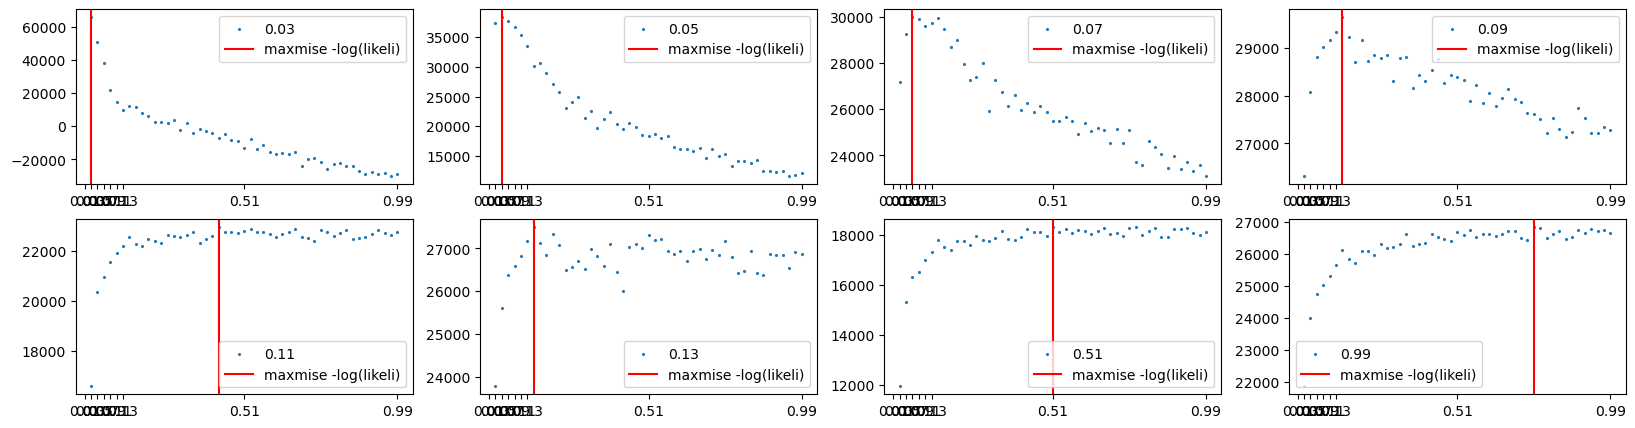

In [120]:
fig, axs = plt.subplots(2,4,figsize=(20,5))
for i in range(1,9):
    row = int((i-0.1)/4)
    col = int((i-0.1)%4)
    ax = axs[row,col]
    pos_le = -R_loglikelihood_sum[i,1:]
    mle = np.where( pos_le == np.min(pos_le))[0][0]
#     print(mle)
    r_s_idx = rs_selected[i]
    r_s = rs[r_s_idx]
    
    ax.scatter(range(1,50), R_loglikelihood_sum[i,1:],label = np.round(r_s,2),s=1.5)
    ax.axvline(mle+1, color='red',label='maxmise -log(likeli)')
#     ax.set_yscale('log')

    ax.set_xticks(rs_selected)
    ax.set_xticklabels(np.round(rs_chosen,2))
#     ax.set_xscale('log')
    
    
    ax.legend()
    
plt.show()